In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
norm = MinMaxScaler()
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')


In [115]:
df = pd.read_csv('ifood_df.csv')

# Checking  outliers

In [116]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

In [117]:
Age_outliers = df[df.Income > Q3 + 1.5*IQR]
Age_outliers

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


In [118]:
Age_outliers = df[df.Income < Q1 - 1.5*IQR] 
Age_outliers 


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


In [119]:
df[df['Income']<= Q1].tail(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2196,11012.0,1,0,82,24,3,26,7,1,23,...,0,0,0,0,1,0,0,61,38,1
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2199,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0


# Checking missing values

In [120]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [122]:
df_Family = pd.DataFrame(df.iloc[:,1:3].sum(), columns = ['Amount']).reset_index()
df_Family

,index,Amount
0,Kidhome,975
1,Teenhome,1117


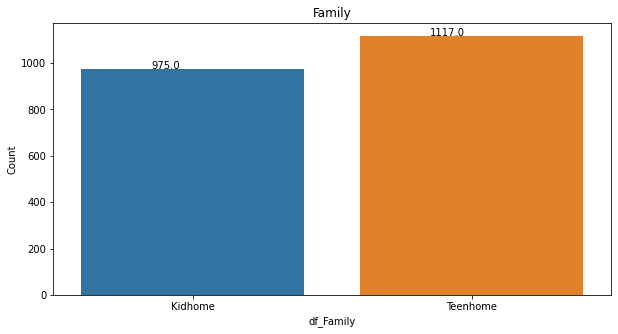

In [123]:
plt.figure(figsize=(10,5))

plt.title('Family')

yx = sns.barplot(x='index',y='Amount',data=df_Family);
plt.xlabel('df_Family')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()


In [124]:
df_c = pd.DataFrame(df.iloc[:,1:3]).copy()

In [125]:
cmp_srate = (df_c.sum(axis = 0) / len(df_c)) * 100

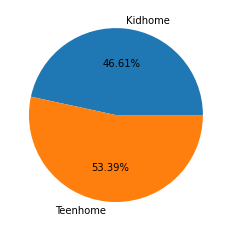

In [126]:
plt.pie(x = cmp_srate, labels = df_c.columns, autopct = '%1.2f%%', shadow = False, explode = None);

In [127]:
df_channel = pd.DataFrame(df.iloc[:,10:15].sum(), columns = ['Amount']).reset_index()
df_channel

,index,Amount
0,NumDealsPurchases,5112
1,NumWebPurchases,9042
2,NumCatalogPurchases,5833
3,NumStorePurchases,12841
4,NumWebVisitsMonth,11768


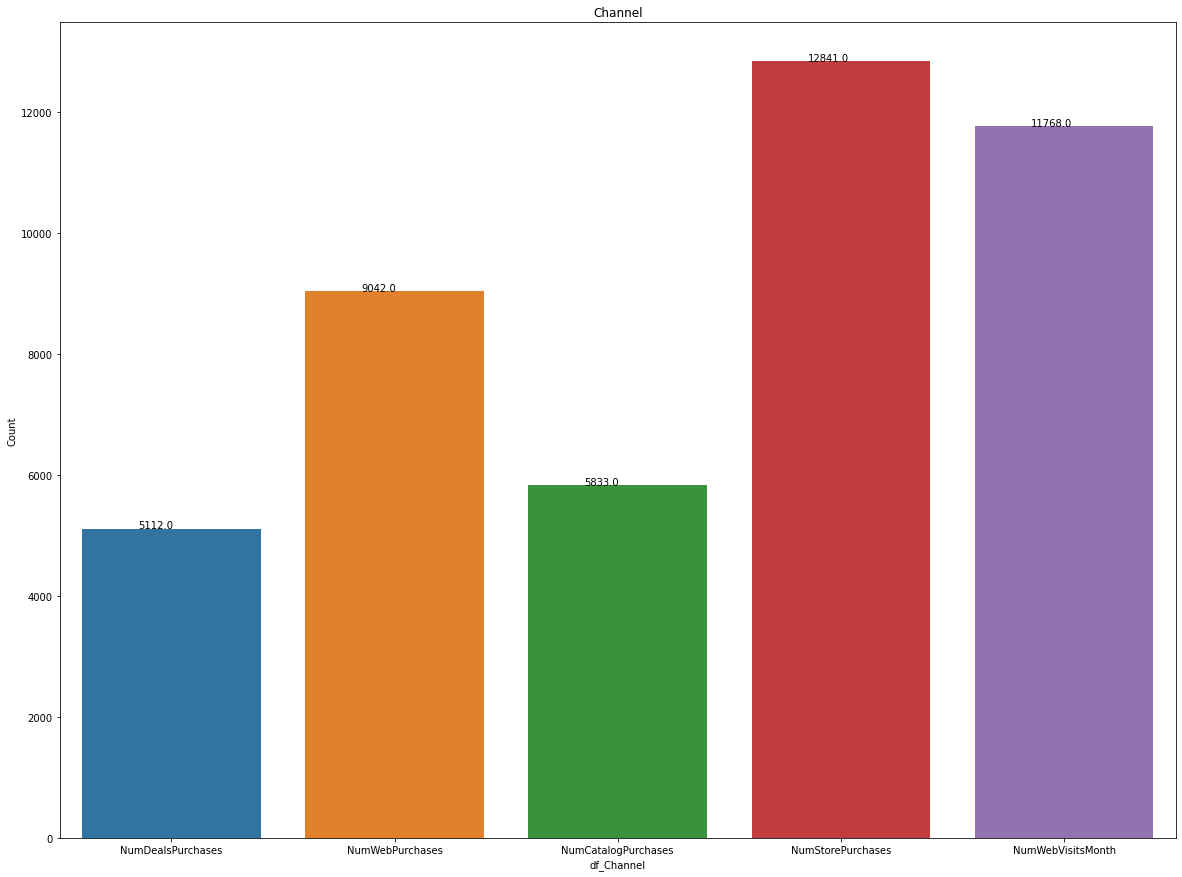

In [128]:
plt.figure(figsize = (20,15))
plt.title('Channel')
yx = sns.barplot(x='index',y='Amount',data=df_channel);
plt.xlabel('df_Channel')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [129]:
df_c = pd.DataFrame(df.iloc[:,10:15]).copy()
cmp_srate = (df_c.sum(axis = 0) / len(df_c)) * 100

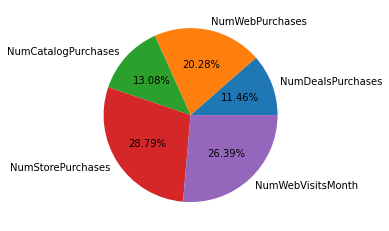

In [130]:
plt.pie(x = cmp_srate, labels = df_c.columns, autopct = '%1.2f%%', shadow = False, explode = None);

In [131]:
df_compaigns = pd.DataFrame(df.iloc[:,15:20].sum(), columns = ['Amount']).reset_index()
df_compaigns

,index,Amount
0,AcceptedCmp3,163
1,AcceptedCmp4,164
2,AcceptedCmp5,161
3,AcceptedCmp1,142
4,AcceptedCmp2,30


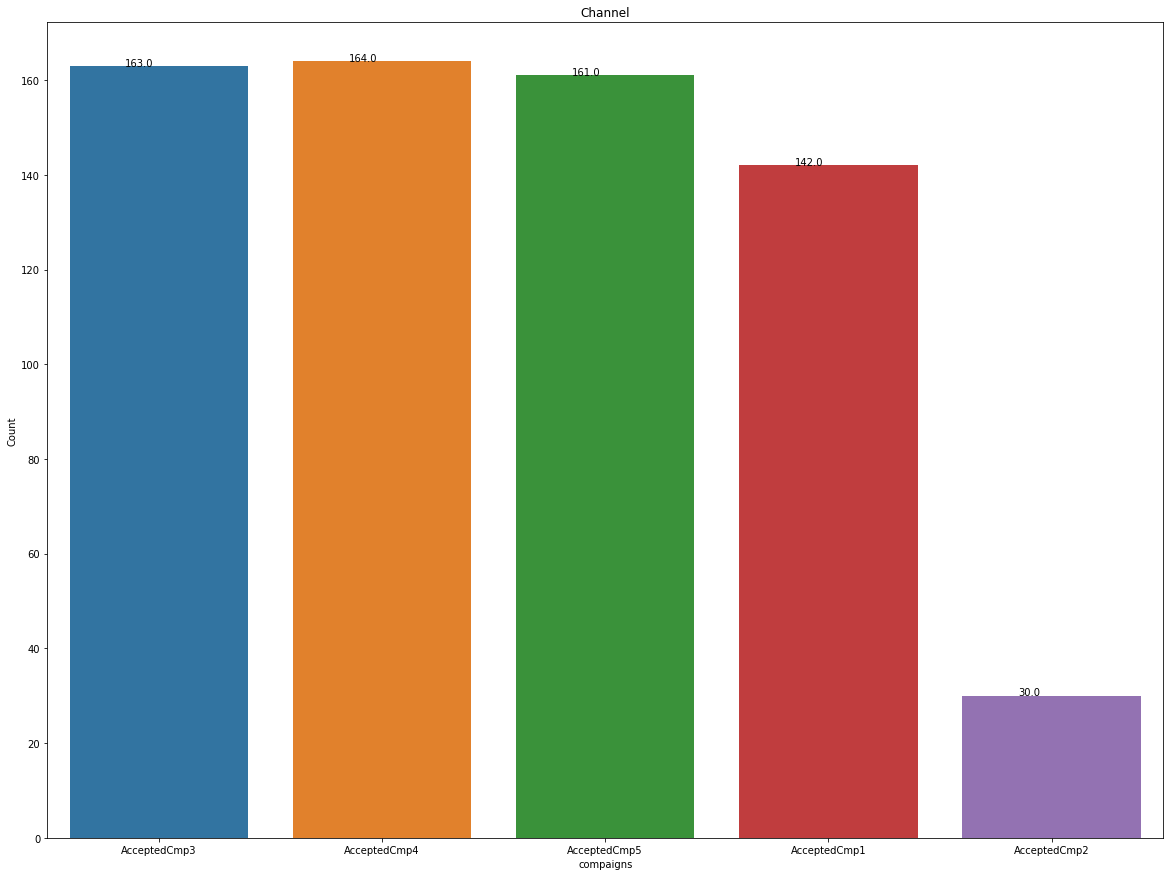

In [132]:
plt.figure(figsize = (20,15))
plt.title('Channel')
yx = sns.barplot(x='index',y='Amount',data=df_compaigns);
plt.xlabel('compaigns')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [133]:
df_c = pd.DataFrame(df.iloc[:,15:20]).copy()

In [134]:
cmp_srate = (df_c.sum(axis = 0) / len(df_c)) * 100

In [135]:
cmp_srate

AcceptedCmp3    7.392290
AcceptedCmp4    7.437642
AcceptedCmp5    7.301587
AcceptedCmp1    6.439909
AcceptedCmp2    1.360544
dtype: float64

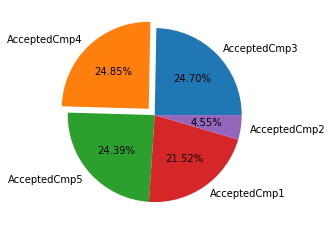

In [136]:
plt.pie(x = cmp_srate, labels = df_c.columns, autopct = '%1.2f%%', shadow = False, explode = [0, 0.1, 0, 0, 0]);

In [137]:
df_Family_Status = pd.DataFrame(df.iloc[:,26:31].sum(), columns = ['Amount']).reset_index()
df_Family_Status

,index,Amount
0,marital_Divorced,230
1,marital_Married,854
2,marital_Single,477
3,marital_Together,568
4,marital_Widow,76


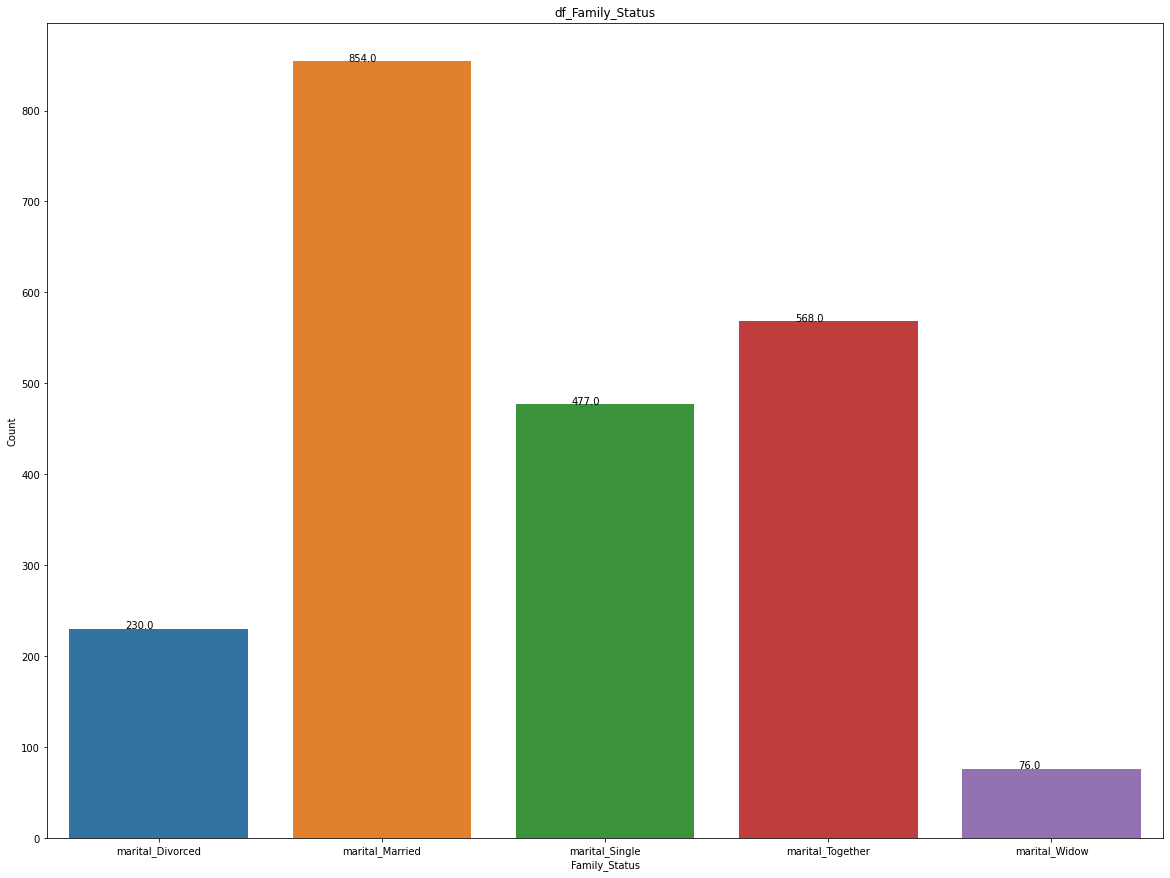

In [138]:
plt.figure(figsize = (20,15))
plt.title('df_Family_Status')
yx = sns.barplot(x='index',y='Amount',data=df_Family_Status);
plt.xlabel('Family_Status')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [139]:
df_c = pd.DataFrame(df.iloc[:,26:31]).copy()
cmp_srate = (df_c.sum(axis = 0) / len(df_c)) * 100

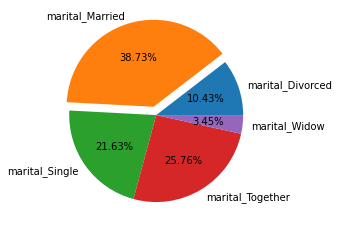

In [140]:
plt.pie(x = cmp_srate, labels = df_c.columns, autopct = '%1.2f%%', shadow = False, explode = [0, 0.1, 0, 0, 0]);

In [141]:
df_Family_Education = pd.DataFrame(df.iloc[:,31:36].sum(), columns = ['Amount']).reset_index()
df_Family_Education

,index,Amount
0,education_2n Cycle,198
1,education_Basic,54
2,education_Graduation,1113
3,education_Master,364
4,education_PhD,476


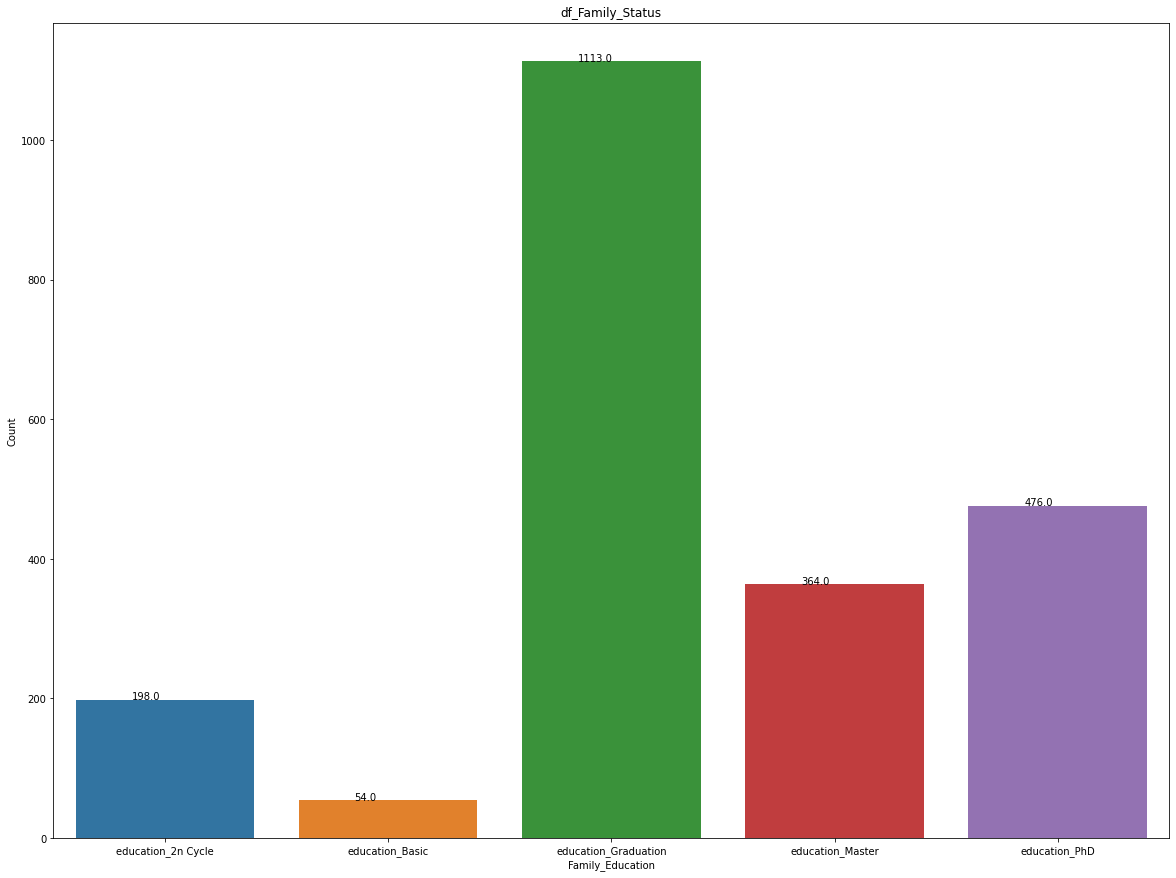

In [142]:
plt.figure(figsize = (20,15))
plt.title('df_Family_Status')
yx = sns.barplot(x='index',y='Amount',data=df_Family_Education);
plt.xlabel('Family_Education')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [143]:
df_c = pd.DataFrame(df.iloc[:,31:36]).copy()
cmp_srate = (df_c.sum(axis = 0) / len(df_c)) * 100

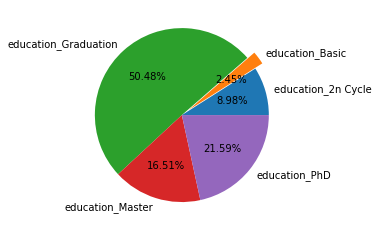

In [144]:
plt.pie(x = cmp_srate, labels = df_c.columns, autopct = '%1.2f%%', shadow = False, explode = [0, 0.1, 0, 0, 0]);

In [145]:
df_Product = pd.DataFrame(df.iloc[:,4:9].sum(), columns = ['Amount']).reset_index()
df_Product

,index,Amount
0,MntWines,675093
1,MntFruits,58219
2,MntMeatProducts,364513
3,MntFishProducts,83253
4,MntSweetProducts,59818


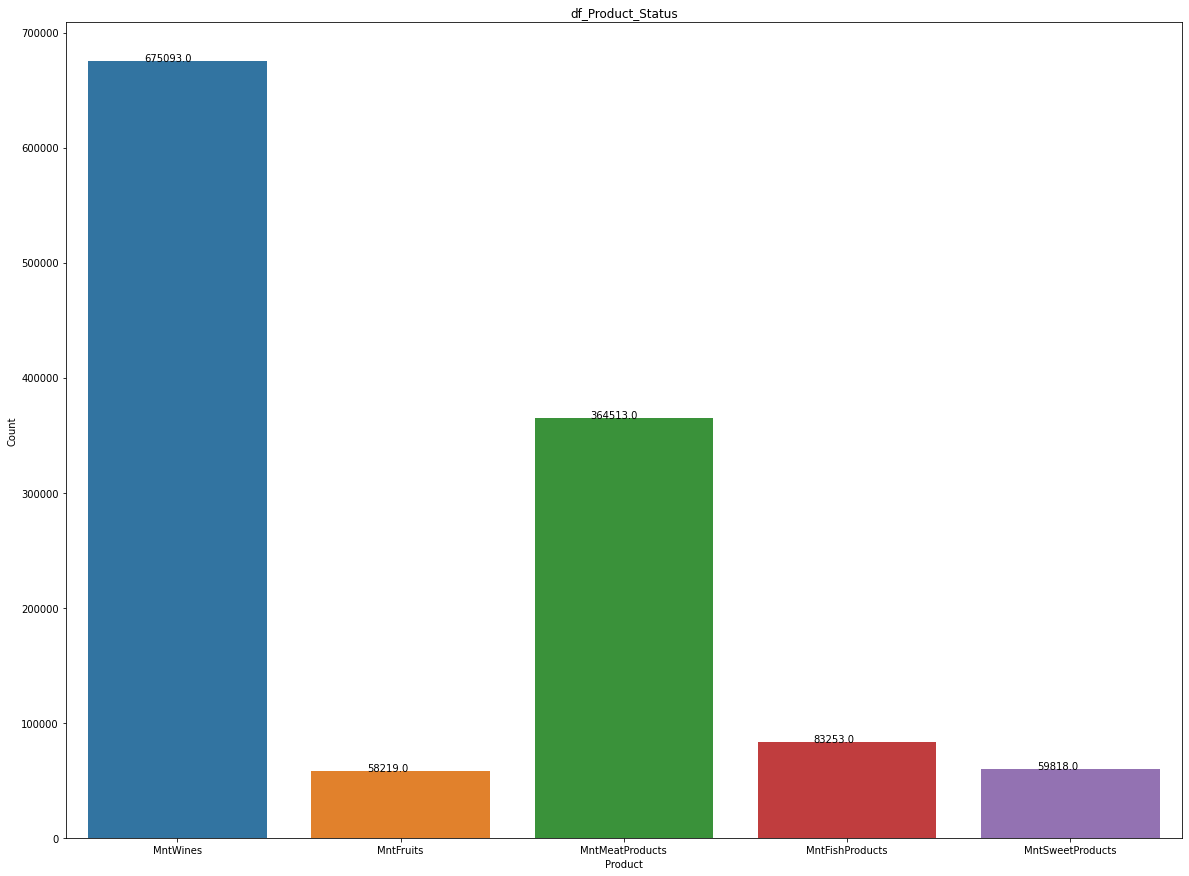

In [146]:
plt.figure(figsize = (20,15))
plt.title('df_Product_Status')
yx = sns.barplot(x='index',y='Amount',data= df_Product);
plt.xlabel('Product')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [147]:
df_P = pd.DataFrame(df.iloc[:,4:9]).copy()
cmp_srate = (df_P.sum(axis = 0) / len(df_c)) 

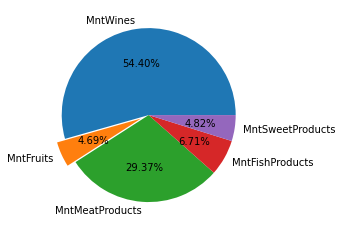

In [148]:
plt.pie(x = cmp_srate, labels = df_P.columns, autopct = '%1.2f%%', shadow = False, explode = [0, 0.1, 0, 0, 0]);

### We can categorize these variable in to 4P's of marketing: Product, people(Customer), Place(Channels) and Promotions(Campaigns)

    People:
       
        Age: Customer's birth year
        Education: Customer's education level
        Marital_Status: Customer's marital status
        Income: Customer's yearly household income
        Kidhome: Number of children in customer's household
        Teenhome: Number of teenagers in customer's household
        Dt_Customer: Date of customer's enrollment with the company
        Recency: Number of days since customer's last purchase
        Complain: 1 if customer complained in the last 2 years, 0 otherwise

    Products:
        MntWines: Amount spent on wine in the last 2 years
        MntFruits: Amount spent on fruits in the last 2 years
        MntMeatProducts: Amount spent on meat in the last 2 years
        MntFishProducts: Amount spent on fish in the last 2 years
        MntSweetProducts: Amount spent on sweets in the last 2 years
        MntGoldProds: Amount spent on gold in the last 2 years

    Promotions:
        MntWines: Amount spent on wine in the last 2 years
        MntFruits: Amount spent on fruits in the last 2 years
        MntMeatProducts: Amount spent on meat in the last 2 years
        MntFishProducts: Amount spent on fish in the last 2 years
        MntSweetProducts: Amount spent on sweets in the last 2 years
        MntGoldProds: Amount spent on gold in the last 2 years

    Places:
        NumWebPurchases: Number of purchases made through the company's web site
        NumCatalogPurchases: Number of purchases made using a catalogue
        NumStorePurchases: Number of purchases made directly in stores
        NumWebVisitsMonth: Number of visits to company's web site in the last month

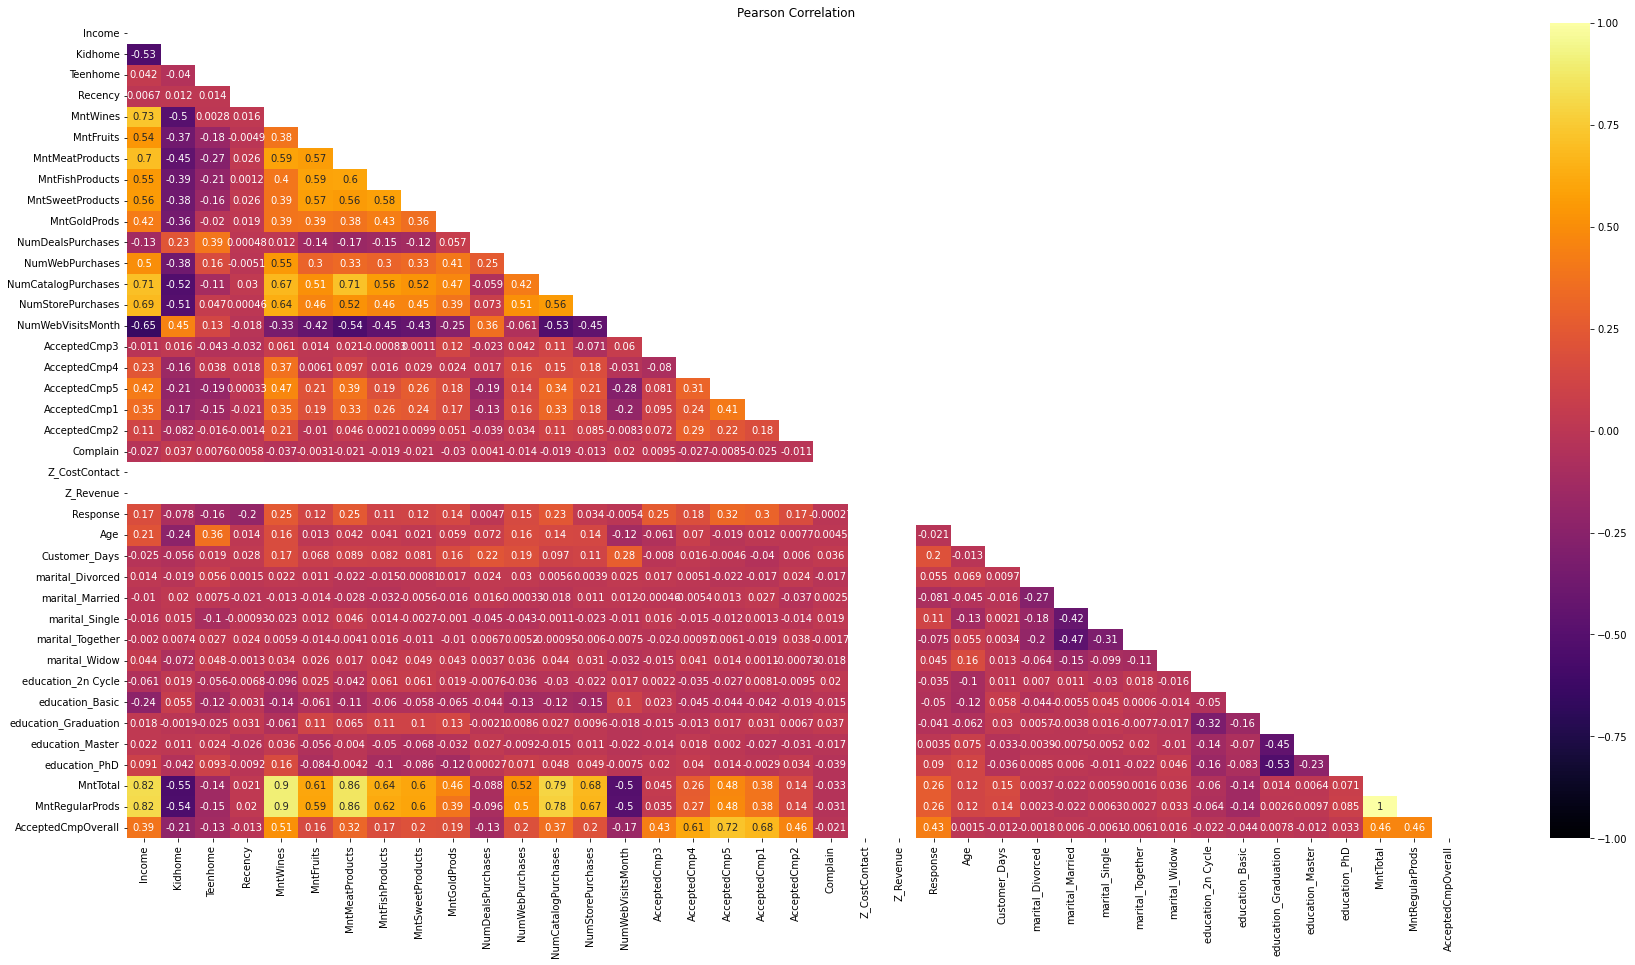

In [149]:
customers_corr = df.corr(method = 'pearson')
fig = plt.figure(figsize = (30, 15))
mask = np.triu(np.ones_like(customers_corr, dtype = bool))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap = 'inferno', vmin = -1, vmax = +1)
plt.title('Pearson Correlation', fontsize=12)
plt.show()

In [150]:
df.drop(['Z_CostContact','Z_Revenue','Response'],axis = 1, inplace = True)

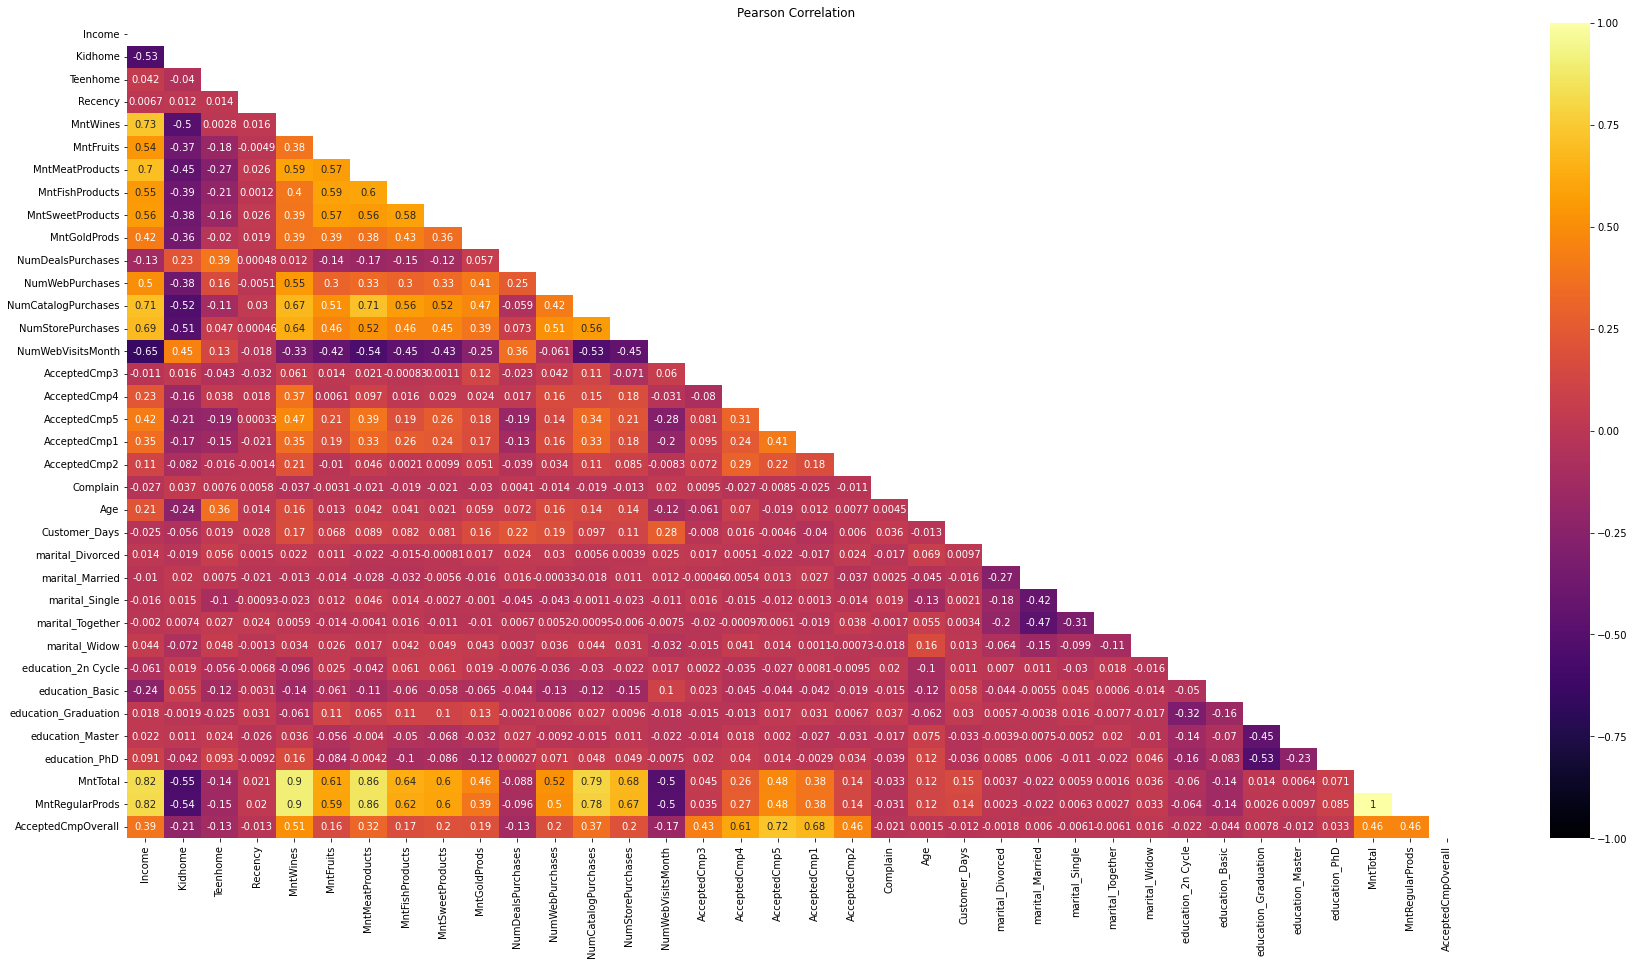

In [151]:
customers_corr = df.corr(method = 'pearson')
fig = plt.figure(figsize = (30, 15))
mask = np.triu(np.ones_like(customers_corr, dtype = bool))
sns.heatmap(customers_corr, mask = mask, annot = True, cmap = 'inferno', vmin = -1, vmax = +1)
plt.title('Pearson Correlation', fontsize=12)
plt.show()

In [152]:
#df['Income'].max()

In [153]:
def correlating(df, threshold):
    cor_col = set()  # names of correlated columns
    corr_matrix =  df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[j]
                cor_col.add(colname)
    return cor_col

In [154]:
corr_features = correlating(df,0.50)
len(corr_features)

16

In [155]:
corr_features

{'AcceptedCmp1',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Income',
 'Kidhome',
 'MntFishProducts',
 'MntFruits',
 'MntMeatProducts',
 'MntSweetProducts',
 'MntTotal',
 'MntWines',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebPurchases',
 'NumWebVisitsMonth',
 'education_Graduation'}

In [156]:
high_corr_df = df[['Income',
                   'MntWines',
                   'MntFishProducts',
                    'MntFruits',
                    'MntMeatProducts',
                    'MntSweetProducts',
                    'AcceptedCmp1',
                     'AcceptedCmp4',
                     'AcceptedCmp5',
                     'Kidhome',
                     'NumCatalogPurchases',
                     'NumStorePurchases',
                     'NumWebPurchases',
                     'education_Graduation']]

In [157]:
high_corr_df.head()

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,AcceptedCmp1,AcceptedCmp4,AcceptedCmp5,Kidhome,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,education_Graduation
0,58138.0,635,172,88,546,88,0,0,0,0,10,4,8,1
1,46344.0,11,2,1,6,1,0,0,0,1,1,2,1,1
2,71613.0,426,111,49,127,21,0,0,0,0,2,10,8,1
3,26646.0,11,10,4,20,3,0,0,0,1,0,4,2,1
4,58293.0,173,46,43,118,27,0,0,0,1,3,6,5,0


In [158]:
df_channel = pd.DataFrame(high_corr_df.iloc[:,10:13].sum(), columns = ['Amount']).reset_index()
df_channel

,index,Amount
0,NumCatalogPurchases,5833
1,NumStorePurchases,12841
2,NumWebPurchases,9042


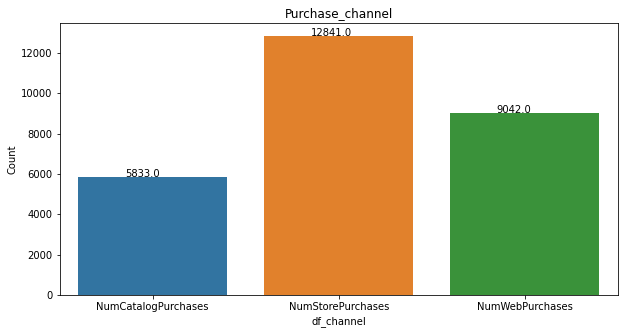

In [159]:
plt.figure(figsize=(10,5))

plt.title('Purchase_channel')

yx = sns.barplot(x='index',y='Amount',data=df_channel);
plt.xlabel('df_channel')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [160]:
df_campaigns = pd.DataFrame(high_corr_df.iloc[:,6:9].sum(), columns = ['Amount']).reset_index()
df_campaigns

,index,Amount
0,AcceptedCmp1,142
1,AcceptedCmp4,164
2,AcceptedCmp5,161


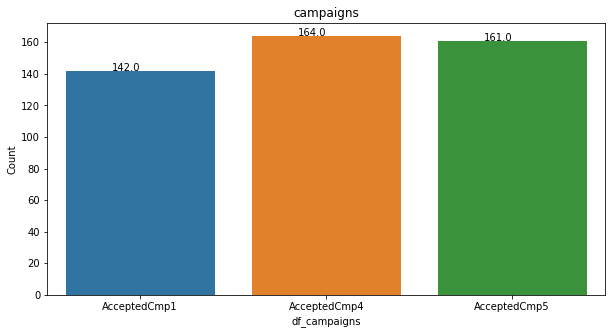

In [161]:
plt.figure(figsize=(10,5))

plt.title('campaigns')

yx = sns.barplot(x='index',y='Amount',data=df_campaigns);
plt.xlabel('df_campaigns')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [162]:
df_Product = pd.DataFrame(high_corr_df.iloc[:,1:6].sum(), columns = ['Amount']).reset_index()
df_Product

,index,Amount
0,MntWines,675093
1,MntFishProducts,83253
2,MntFruits,58219
3,MntMeatProducts,364513
4,MntSweetProducts,59818


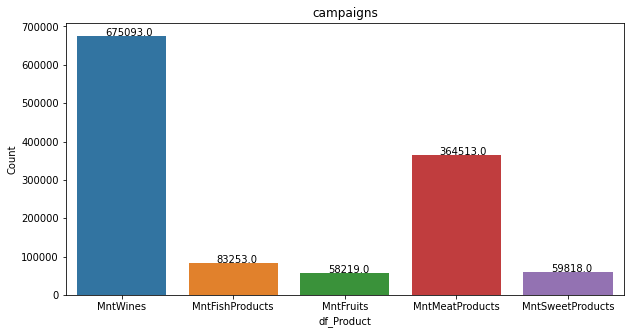

In [163]:
plt.figure(figsize=(10,5))

plt.title('campaigns')

yx = sns.barplot(x='index',y='Amount',data=df_Product);
plt.xlabel('df_Product')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

In [164]:
high_corr_df['Expenditure'] = high_corr_df['MntWines'] + high_corr_df['MntSweetProducts'] + high_corr_df['MntMeatProducts']+  high_corr_df['MntFruits'] + high_corr_df['MntFishProducts'] 

In [165]:
high_corr_df['Expenditure']

0       1529
1         21
2        734
3         48
4        407
        ... 
2200    1094
2201     436
2202    1217
2203     782
2204     151
Name: Expenditure, Length: 2205, dtype: int64

In [166]:
Data_continous = high_corr_df[['Income','MntWines','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts','Expenditure']]

In [167]:
Data_continous.head(3)

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,Expenditure
0,58138.0,635,172,88,546,88,1529
1,46344.0,11,2,1,6,1,21
2,71613.0,426,111,49,127,21,734


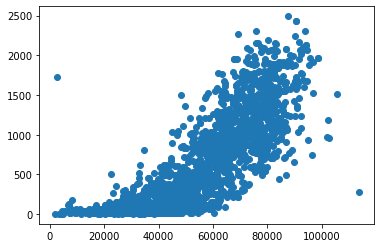

In [201]:
plt.scatter(Data_continous['Income'],Data_continous['Expenditure'])


In [169]:
 df_new = Data_continous[['Income','MntWines']]

In [170]:
normal_data = norm.fit_transform( df_new)

In [171]:
normal_data

array([[0.50362487, 0.42531815],
       [0.39832506, 0.00736772],
       [0.62393307, 0.28533155],
       ...,
       [0.49329488, 0.60817147],
       [0.60279097, 0.28667113],
       [0.45658191, 0.05626256]])

In [172]:
normal_df =  pd.DataFrame(normal_data, columns=['Income','MntWines' ])

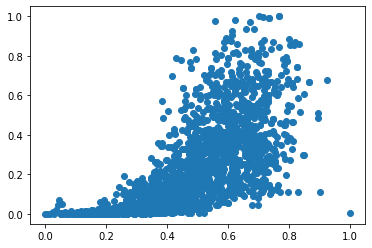

In [173]:
#plt.figuresize(figsize =(30,20))
plt.scatter(normal_df['Income'],normal_df['MntWines'])

In [174]:
normalized_data = norm.fit_transform(high_corr_df)
normalized_data

array([[0.50362487, 0.42531815, 0.66409266, ..., 0.2962963 , 1.        ,
        0.61318858],
       [0.39832506, 0.00736772, 0.00772201, ..., 0.03703704, 1.        ,
        0.00683554],
       [0.62393307, 0.28533155, 0.42857143, ..., 0.2962963 , 1.        ,
        0.29352634],
       ...,
       [0.49329488, 0.60817147, 0.12355212, ..., 0.07407407, 1.        ,
        0.48773623],
       [0.60279097, 0.28667113, 0.30888031, ..., 0.22222222, 0.        ,
        0.3128267 ],
       [0.45658191, 0.05626256, 0.00772201, ..., 0.11111111, 0.        ,
        0.05910736]])

In [175]:
normalized_data.shape

(2205, 15)

In [176]:
pca = PCA(n_components= 0.81)

In [177]:
pca.fit(normalized_data)
#pca = PCA(n_components= 0.8)

PCA(n_components=0.81)

In [178]:
#pca = PCA(n_components=0.8)

In [179]:
pca.fit(normalized_data)

PCA(n_components=0.81)

In [180]:
pca.explained_variance_ratio_

array([0.3331864 , 0.28859591, 0.09985456, 0.06639234, 0.04545863])

In [181]:
pca.components_

array([[ 2.91225479e-01,  3.43975244e-01,  2.62363332e-01,
         2.39270211e-01,  1.81457813e-01,  1.87132839e-01,
         2.12929623e-01,  1.61592740e-01,  2.58709291e-01,
        -3.27646022e-01,  1.43061395e-01,  3.43678812e-01,
         1.00184154e-01,  2.22829889e-01,  3.98538579e-01],
       [ 7.02463949e-02,  1.25889805e-01,  1.34869298e-02,
         7.02463365e-03,  2.89579002e-02,  1.01531960e-02,
         4.02151123e-02,  6.16233963e-02,  6.34623673e-02,
        -8.77017577e-02,  3.16825647e-02,  8.73006382e-02,
         2.57416090e-02, -9.70505961e-01,  9.86960238e-02],
       [-5.29880662e-02,  9.16019522e-02, -2.37135625e-01,
        -2.29587645e-01, -6.18555383e-02, -1.34005166e-01,
         3.72120187e-01,  6.14877511e-01,  4.87437550e-01,
         2.22820285e-01, -4.61788622e-02, -2.16553368e-01,
        -4.08570078e-02,  3.93854213e-02, -4.50963050e-02],
       [ 3.34279215e-03, -1.19485312e-01,  2.18053431e-01,
         1.72064804e-01,  1.02366522e-01,  1.37591570

In [182]:
scores_pca = pca.transform(normalized_data)
scores_pca 

array([[ 0.68312059, -0.38518191, -0.36188625,  0.12309551,  0.02528828],
       [-0.41737632, -0.60353841,  0.12279712,  0.08046206,  0.04205549],
       [ 0.45973934, -0.40884593, -0.3032842 , -0.14041896, -0.00337278],
       ...,
       [ 0.75570356, -0.28401894,  0.37164707, -0.84662292,  0.19324109],
       [ 0.20814457,  0.56326046, -0.30163774, -0.1122361 , -0.01509933],
       [-0.51710433,  0.39870582,  0.04182442,  0.09158804,  0.10540667]])

In [183]:
scores_pca.shape

(2205, 5)

In [184]:
wcss = []
for i in range(1,11):
    kmeans_pca =KMeans(n_clusters = i)
    kmeans_pca.fit(scores_pca )
    wcss.append(kmeans_pca.inertia_)

In [185]:
wcss

[1590.5381553348855,
 1035.66918618042,
 752.5137553376156,
 547.8545275023175,
 428.4726548189488,
 359.9975785012566,
 315.382508273495,
 281.43174912503355,
 248.5806540107361,
 218.2077425508333]

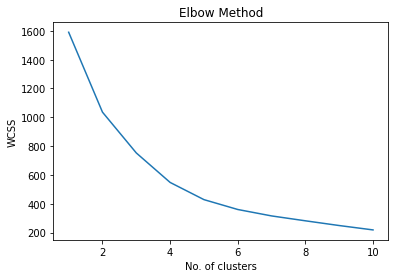

In [186]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# I will take 4 as number of clusters because the graph became flat after 4

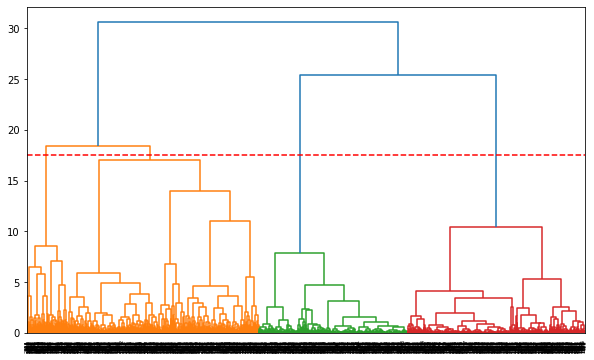

In [187]:
plt.figure(figsize = (10,6))
shc.dendrogram(shc.linkage(normalized_data , method='ward'))
plt.axhline(y = 17.5, color='r', linestyle='--')
plt.show()

In [ ]:
# I used this graph to veriy the number of clusters. Since the horizontal line cross the four vertical lines including the longest
# I will take 4 as number of clusters.

In [188]:
kmeans_pca = KMeans(n_clusters = 4)


In [189]:
y_pred = kmeans_pca.fit_predict(scores_pca)

In [190]:
y_pred

array([1, 3, 1, ..., 1, 2, 0])

In [191]:
scores_pca.shape

(2205, 5)

In [192]:
df_seg_pca_kmeans = pd.concat([high_corr_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
df_seg_pca_kmeans.columns.values[-5: ] = ['Component1','Component2','Component3', 'Component4','Component5']

df_seg_pca_kmeans.head(3) 

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,AcceptedCmp1,AcceptedCmp4,AcceptedCmp5,Kidhome,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,education_Graduation,Expenditure,Component1,Component2,Component3,Component4,Component5
0,58138.0,635,172,88,546,88,0,0,0,0,10,4,8,1,1529,0.683121,-0.385182,-0.361886,0.123096,0.025288
1,46344.0,11,2,1,6,1,0,0,0,1,1,2,1,1,21,-0.417376,-0.603538,0.122797,0.080462,0.042055
2,71613.0,426,111,49,127,21,0,0,0,0,2,10,8,1,734,0.459739,-0.408846,-0.303284,-0.140419,-0.003373


In [193]:
df_seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [194]:
kmeans_pca.labels_

array([1, 3, 1, ..., 1, 2, 0])

In [195]:
df_seg_pca_kmeans 

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,AcceptedCmp1,AcceptedCmp4,AcceptedCmp5,Kidhome,...,NumStorePurchases,NumWebPurchases,education_Graduation,Expenditure,Component1,Component2,Component3,Component4,Component5,Segment K-means PCA
0,58138.0,635,172,88,546,88,0,0,0,0,...,4,8,1,1529,0.683121,-0.385182,-0.361886,0.123096,0.025288,1
1,46344.0,11,2,1,6,1,0,0,0,1,...,2,1,1,21,-0.417376,-0.603538,0.122797,0.080462,0.042055,3
2,71613.0,426,111,49,127,21,0,0,0,0,...,10,8,1,734,0.459739,-0.408846,-0.303284,-0.140419,-0.003373,1
3,26646.0,11,10,4,20,3,0,0,0,1,...,4,2,1,48,-0.398180,-0.600733,0.086136,0.050616,0.066038,3
4,58293.0,173,46,43,118,27,0,0,0,1,...,6,5,0,407,-0.253727,0.443040,-0.101340,0.137461,0.213855,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,709,42,43,182,118,0,0,0,0,...,4,9,1,1094,0.403771,-0.414543,-0.172236,-0.054754,-0.049236,1
2201,64014.0,406,0,0,30,0,1,0,0,2,...,5,8,0,436,-0.278672,0.452366,0.515712,0.692518,0.024566,0
2202,56981.0,908,32,48,217,12,0,1,0,0,...,13,2,1,1217,0.755704,-0.284019,0.371647,-0.846623,0.193241,1
2203,69245.0,428,80,30,214,30,0,0,0,0,...,10,6,0,782,0.208145,0.563260,-0.301638,-0.112236,-0.015099,2


In [196]:
df_seg_pca_kmeans.groupby(['Segment K-means PCA']).mean()

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,AcceptedCmp1,AcceptedCmp4,AcceptedCmp5,Kidhome,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,education_Graduation,Expenditure,Component1,Component2,Component3,Component4,Component5
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,
0,37689.644338,83.154705,8.346093,5.767145,32.089314,5.661882,0.004785,0.011164,0.000000,0.725678,0.822967,3.647528,2.778309,0.0,135.019139,-0.512566,0.398735,0.023475,0.051201,-0.014937
1,71592.091102,559.161017,87.769068,62.658898,364.720339,63.002119,0.167373,0.135593,0.182203,0.059322,5.175847,8.572034,5.692797,1.0,1137.311441,0.667775,-0.360882,-0.063795,-0.002709,0.007912
2,69542.174194,655.602151,63.608602,43.391398,311.436559,45.926882,0.126882,0.167742,0.161290,0.062366,4.924731,8.683871,5.827957,0.0,1119.965591,0.386452,0.611775,-0.047793,-0.054880,0.020116
3,37545.606864,84.517941,10.943838,7.567863,42.787832,8.073323,0.001560,0.023401,0.000000,0.722309,0.911076,3.853354,2.968799,1.0,153.890796,-0.270687,-0.568090,0.058683,-0.008277,-0.005808


In [197]:
df_seg_pca_kmeans['Labels'] = df_seg_pca_kmeans['Segment K-means PCA'].map({0 : 'clustor 0',
                        1 : 'clustor 1',
                        2 : 'clustor 2',
                        3 : 'clustor 3'                                                  
                       })

In [198]:
df_seg_pca_kmeans.set_index('Labels')

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,AcceptedCmp1,AcceptedCmp4,AcceptedCmp5,Kidhome,...,NumStorePurchases,NumWebPurchases,education_Graduation,Expenditure,Component1,Component2,Component3,Component4,Component5,Segment K-means PCA
Labels,,,,,,,,,,,,,,,,,,,,,
clustor 1,58138.0,635,172,88,546,88,0,0,0,0,...,4,8,1,1529,0.683121,-0.385182,-0.361886,0.123096,0.025288,1
clustor 3,46344.0,11,2,1,6,1,0,0,0,1,...,2,1,1,21,-0.417376,-0.603538,0.122797,0.080462,0.042055,3
clustor 1,71613.0,426,111,49,127,21,0,0,0,0,...,10,8,1,734,0.459739,-0.408846,-0.303284,-0.140419,-0.003373,1
clustor 3,26646.0,11,10,4,20,3,0,0,0,1,...,4,2,1,48,-0.398180,-0.600733,0.086136,0.050616,0.066038,3
clustor 0,58293.0,173,46,43,118,27,0,0,0,1,...,6,5,0,407,-0.253727,0.443040,-0.101340,0.137461,0.213855,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
clustor 1,61223.0,709,42,43,182,118,0,0,0,0,...,4,9,1,1094,0.403771,-0.414543,-0.172236,-0.054754,-0.049236,1
clustor 0,64014.0,406,0,0,30,0,1,0,0,2,...,5,8,0,436,-0.278672,0.452366,0.515712,0.692518,0.024566,0
clustor 1,56981.0,908,32,48,217,12,0,1,0,0,...,13,2,1,1217,0.755704,-0.284019,0.371647,-0.846623,0.193241,1


In [315]:
df_seg_pca_kmeans.shape

(2205, 22)

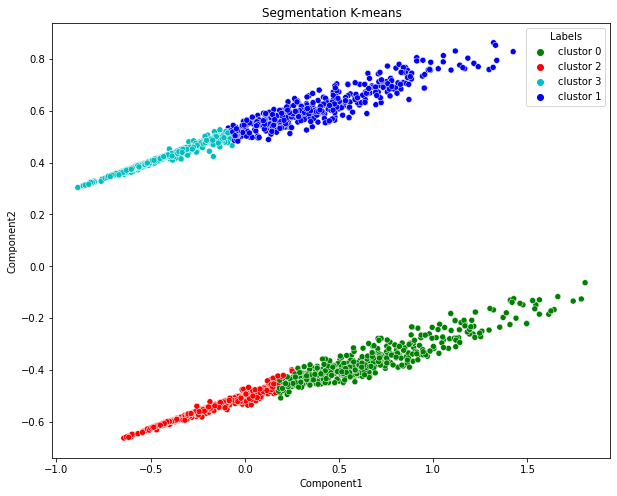

In [97]:
x_axis = df_seg_pca_kmeans['Component1']
y_axis = df_seg_pca_kmeans['Component2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Labels'], palette = ['g', 'r', 'c','b'])
plt.title('Segmentation K-means')
plt.show()

In [99]:
df_seg_pca_kmeans['Labels'] = df_seg_pca_kmeans['Segment K-means PCA'].map({0 : 'Higher-Income spending low',
                        1 : 'Higher-Income spending High',
                        2 : 'Low-Income Spending Low' ,
                        3 : 'Low-Income spending high'                                                  
                       })

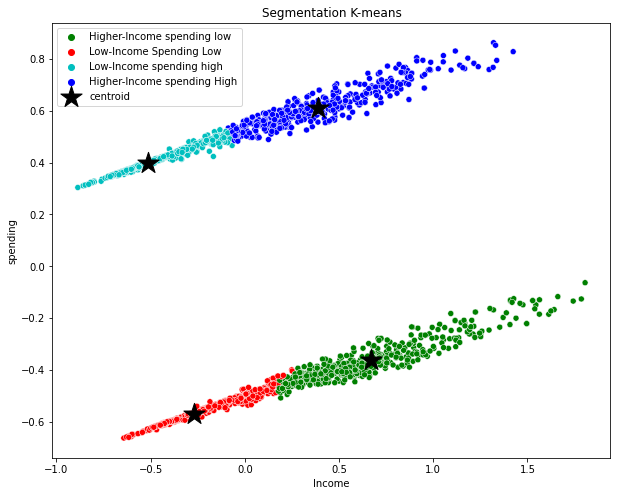

In [105]:
x_axis = df_seg_pca_kmeans['Component1']
y_axis = df_seg_pca_kmeans['Component2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Labels'], palette = ['g', 'r', 'c','b'])


plt.scatter(kmeans_pca.cluster_centers_[:, 0],kmeans_pca.cluster_centers_[:, 1], color = 'black', marker='*', label = 'centroid',s = 500)
plt.xlabel('Income')
plt.ylabel('spending')
plt.title('Segmentation K-means')
plt.legend()
plt.show()

In [104]:
df_seg_pca_kmeans.groupby(['Segment K-means PCA']).count()/len(df_seg_pca_kmeans)

,Income,MntWines,MntFishProducts,MntFruits,MntMeatProducts,MntSweetProducts,AcceptedCmp1,AcceptedCmp4,AcceptedCmp5,Kidhome,...,NumStorePurchases,NumWebPurchases,education_Graduation,Expenditure,Component1,Component2,Component3,Component4,Component5,Labels
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,...,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059,0.214059
1,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,...,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884,0.210884
2,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,...,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703,0.290703
3,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,...,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354,0.284354


    28.4%  of customers have lower income but spend more for products than the other lower income groups.
    29.1%  of Customers have relatively lower income and spend lower for  products than the other group
    21.4 % of customers have higher income and spend lower for products than the other hihg income group
    21.1%  of customers have higher income and spend higher for products than the other group